<a href="https://colab.research.google.com/github/divyalaldinani/FoodLens/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Jan 27 11:57:48 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf

### Importing Helper functions

In [3]:
!wget https://raw.githubusercontent.com/divyalaldinani/FoodLens/refs/heads/main/helper_functions.py

--2025-01-27 11:57:57--  https://raw.githubusercontent.com/divyalaldinani/FoodLens/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4090 (4.0K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   3.99K  --.-KB/s    in 0s      

2025-01-27 11:57:57 (57.1 MB/s) - ‘helper_functions.py’ saved [4090/4090]



In [4]:
from helper_functions import prep_and_load_file, pred_and_plot, plot_loss_curves, unzip_folder, walk_through_directory, view_random_image, view_random_image_and_augmented

### Using TensorFlow Datasets to download Data

Food101 Dataset is a classic dataset used on numerous models to set benchmark for image classification in Food, thus it is available in TensorFlow DataSet

In [5]:
import tensorflow_datasets as tfds

In [6]:
#getting list of all datasets available in TensorFlow DataSets
dataset_lists = tfds.list_builders()
"food101" in dataset_lists

True

In [ ]:
#Loading data from tensorflow datasets

(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'], # all are: train, validation, test
                                             shuffle_files=True, # shuffles files
                                             as_supervised=True, # download data in tuple format (image, label)
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [8]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_dir=PosixGPath('/tmp/tmpktqc36v6tfds'),
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examp

In [9]:
ds_info.description

"This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels."

In [10]:
ds_info.dataset_size

4.77 GiB

In [11]:
ds_info.file_format

<FileFormat.TFRECORD: 'tfrecord'>

In [14]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [21]:
class_names = ds_info.features['label'].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [24]:
len(class_names)

101

### Exploring the Food 101 DataSet

(512, 289, 3)
tf.Tensor(
[[[145 151 125]
  [157 163 137]
  [159 165 139]
  ...
  [197 209 199]
  [197 209 199]
  [197 207 198]]

 [[146 152 126]
  [156 162 136]
  [158 164 138]
  ...
  [197 209 199]
  [197 209 199]
  [199 209 200]]

 [[150 156 130]
  [155 161 135]
  [157 163 137]
  ...
  [197 209 199]
  [197 209 199]
  [199 209 198]]

 ...

 [[173 186 177]
  [174 187 178]
  [176 189 180]
  ...
  [181 197 187]
  [181 197 187]
  [178 195 187]]

 [[176 187 179]
  [176 187 179]
  [176 189 180]
  ...
  [182 198 188]
  [182 198 188]
  [180 197 189]]

 [[178 189 181]
  [177 188 180]
  [175 188 179]
  ...
  [179 195 185]
  [179 195 185]
  [179 196 190]]], shape=(512, 289, 3), dtype=uint8)
frozen_yogurt


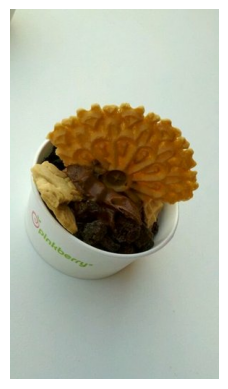

In [34]:
import matplotlib.pyplot as plt

for image, label in train_data.take(1): # takes 1 batch of train_data, as_supervised = True returns tuple with structure (image, label)
    print(image.shape)
    print(image)
    print(class_names[label])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [32]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [33]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

### Preprocessing the data

In [40]:
def preprocess_image(image, label, img_shape=(224, 224)):
    """Converts image to tensor having data type as required by input image,
    i.e., 'float32' and reshapes image to required dims"""
    image = tf.image.resize(image, (img_shape))
    return tf.cast(image, tf.float32), label # returns image and label

In [42]:
image, label = preprocess_image(image, label, img_shape=(224, 224))

In [43]:
image.shape

TensorShape([224, 224, 3])

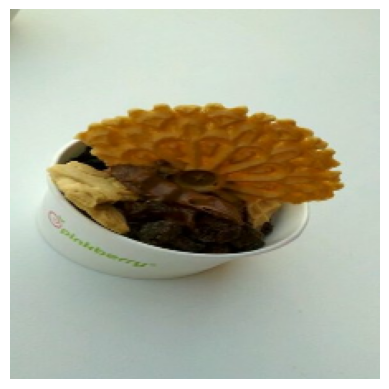

In [47]:
plt.imshow(image/255.) # in float32 -> the range must be 0-1, in uint8 -> range 0-255
plt.axis('off')
plt.show()

### Batch and Prepare Datasets

`Original data -> map() -> shuffle() -> batch() -> prefetch() -> PrefecthDataset`